In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

uploaded = files.upload()

Saving rapido_ride_data.csv to rapido_ride_data.csv


In [10]:
# readig the uploaded file as rapido_data
rapido_data = pd.read_csv(io.BytesIO(uploaded['rapido_ride_data.csv']))
rapido_data


,Customer_ID,Booking_Date,Ride_Fare,Payment_Method,Promo_Code,Travel_Time,Ride_Distance,City,Driver_ID,Cancellation_Status
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2024-09-27 10:39:28.012150,199.78,Debit Card,RIDE100,38,12.37,Pune,107217c0-5156-425d-a95c-00b1e6a5232b,1
1,23b8c1e9-3924-46de-beb1-3b9046685257,2023-12-03 12:32:58.482637,476.34,Debit Card,RIDE100,12,5.67,Mumbai,7e40dc38-a0d7-4717-a07c-419b0d33812f,0
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,2024-03-29 22:16:02.350037,371.36,Cash,WELCOME,19,11.39,Chennai,bc6c5660-c536-438f-bffc-4538d8f7c912,1
3,972a8469-1641-4f82-8b9d-2434e465e150,2024-07-03 01:45:21.554955,307.36,UPI,RIDE100,21,17.60,Hyderabad,828f4e2e-7c4c-493f-9312-ec8120b62158,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,2024-01-01 17:39:09.359878,94.89,UPI,RIDE100,10,17.96,Hyderabad,cb0445a2-69ab-4281-b3c6-b072416862e7,0
...,...,...,...,...,...,...,...,...,...,...
99995,95898eb0-3712-4824-accb-8d40fab73167,2023-12-05 18:32:55.087785,400.31,Debit Card,WELCOME,7,19.84,Bengaluru,b39adc6d-dec6-454e-8403-f10f92f3e43d,0
99996,960dc639-d199-4aae-a22e-18d4dfc07403,2024-07-05 10:41:42.684772,394.04,UPI,RIDE100,7,14.17,Chennai,9b84d5ab-7c2a-443e-94f2-027c77881d7c,0
99997,f9897ea5-454f-43c2-a464-2de35502fe95,2024-01-15 09:20:22.536223,343.74,UPI,WELCOME,28,7.66,Delhi,48fcd442-b88a-4781-b92a-1dafcc2e1472,0
99998,17d6608f-5c4b-44da-a4ec-f3171120f7bb,2023-12-19 19:49:15.614335,259.73,Credit Card,FREERIDE,9,9.97,Pune,9257d067-5908-4671-9f73-54c94b68c008,0


In [11]:
#checking the datastructure
rapido_data.shape

(100000, 10)

In [5]:
#checking the datatypes
rapido_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customer_ID          100000 non-null  object 
 1   Booking_Date         100000 non-null  object 
 2   Ride_Fare            100000 non-null  float64
 3   Payment_Method       100000 non-null  object 
 4   Promo_Code           79935 non-null   object 
 5   Travel_Time          100000 non-null  int64  
 6   Ride_Distance        100000 non-null  float64
 7   City                 100000 non-null  object 
 8   Driver_ID            100000 non-null  object 
 9   Cancellation_Status  100000 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


In [12]:
# Convert Booking_Date to datetime type for further analysis
rapido_data['Booking_Date'] = pd.to_datetime(rapido_data['Booking_Date'])


In [7]:

# Display descriptive statistics for each column
rapido_data.describe()

,Booking_Date,Ride_Fare,Travel_Time,Ride_Distance,Cancellation_Status
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2024-04-28 01:03:41.259369472,259.754355,31.971500,10.513775,0.501790
min,2023-10-28 08:06:07.513069,20.000000,5.000000,1.000000,0.000000
25%,2024-01-28 08:44:36.804328960,139.780000,18.000000,5.740000,0.000000
50%,2024-04-28 14:09:29.051164416,260.300000,32.000000,10.530000,1.000000
75%,2024-07-27 16:41:14.828851968,379.770000,46.000000,15.270000,1.000000
max,2024-10-27 13:42:56.367980,500.000000,59.000000,20.000000,1.000000
std,NaN,138.403903,15.874029,5.491895,0.499999


In [ ]:

# Check for duplicates based on all columns
duplicate_rows = rapido_data[rapido_data.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
  print("Duplicate Rows:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")

# Check for duplicates based on specific columns (e.g., 'Customer_ID')
duplicate_ride_ids = rapido_data[rapido_data.duplicated(subset=['Customer_ID'])]

# Print the duplicate ride IDs (if any)
if not duplicate_ride_ids.empty:
  print("\nDuplicate Ride IDs:")
  print(duplicate_ride_ids)
else:
  print("\nNo duplicate Ride IDs found.")

No duplicate rows found.

No duplicate Ride IDs found.


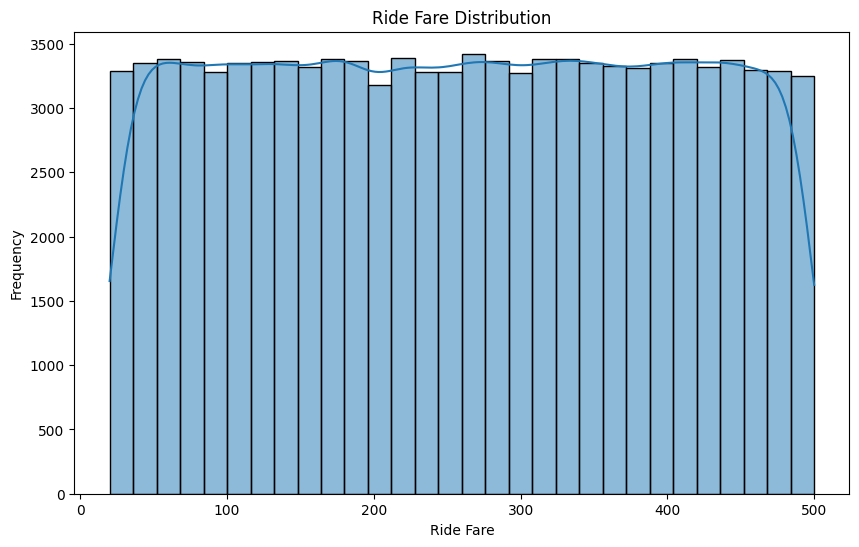

In [ ]:
# 1. Ride Fare Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(rapido_data['Ride_Fare'], bins=30, kde=True)
plt.title('Ride Fare Distribution')
plt.xlabel('Ride Fare')
plt.ylabel('Frequency')
plt.show()


<ipython-input-13-cf1bdfec02e2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_Slot', y='Ride_Fare', data=rapido_data, palette='Set2')


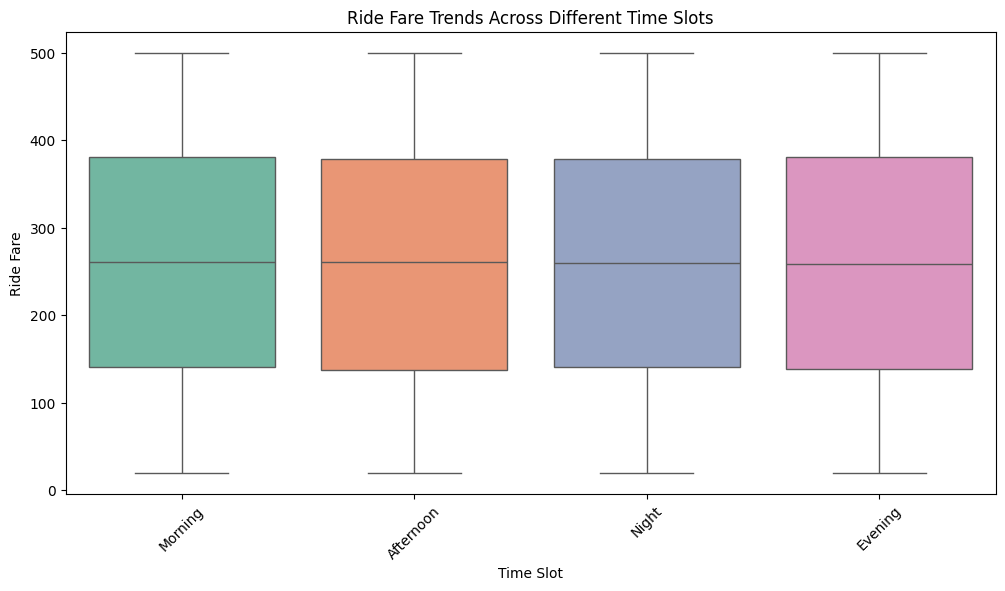

In [ ]:
# Convert Booking_Date to datetime type for further analysis
rapido_data['Booking_Date'] = pd.to_datetime(rapido_data['Booking_Date'])

# Adding a column for time slots (Morning, Afternoon, Evening, Night)
rapido_data['Booking_Hour'] = rapido_data['Booking_Date'].dt.hour

def get_time_slot(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

rapido_data['Time_Slot'] = rapido_data['Booking_Hour'].apply(get_time_slot)

# Analyzing fare trends based on time slots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time_Slot', y='Ride_Fare', data=rapido_data, palette='Set2')
plt.title('Ride Fare Trends Across Different Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Ride Fare')
plt.xticks(rotation=45)
plt.show()

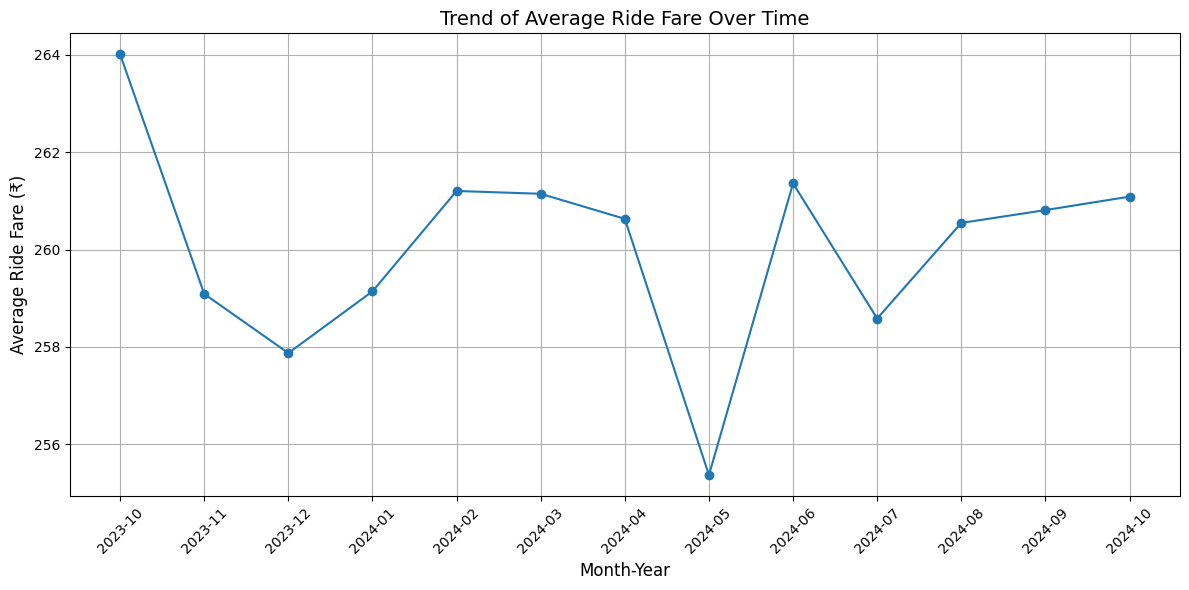

In [ ]:
# Extracting the month and year from Booking_Date for grouping
rapido_data['Year_Month'] = rapido_data['Booking_Date'].dt.to_period('M')

# Grouping by Year_Month to calculate average ride fare
monthly_fare_trends = rapido_data.groupby('Year_Month')['Ride_Fare'].mean().reset_index()
monthly_fare_trends['Year_Month'] = monthly_fare_trends['Year_Month'].astype(str)

# Plotting the trend of average ride fare over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_fare_trends['Year_Month'], monthly_fare_trends['Ride_Fare'], marker='o')
plt.title('Trend of Average Ride Fare Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Ride Fare (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-12-250c7e375a3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Booking_Hour', data=rapido_data, palette='viridis')


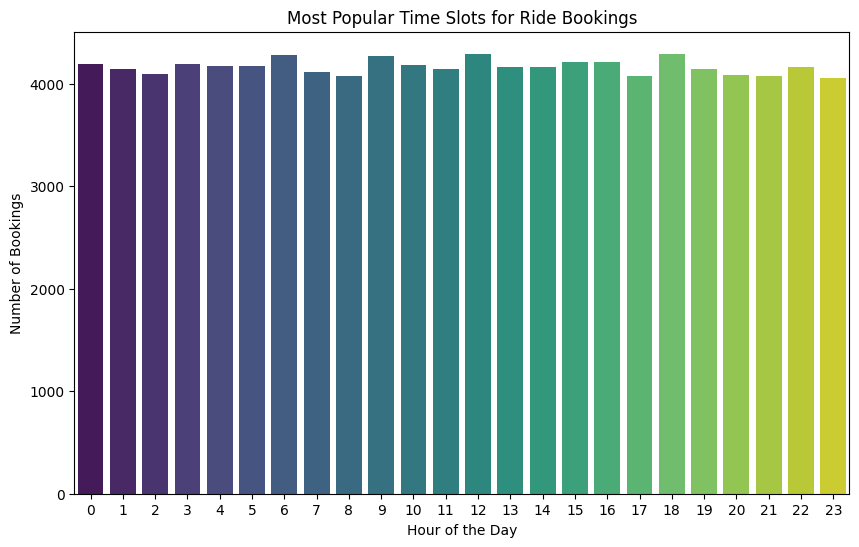

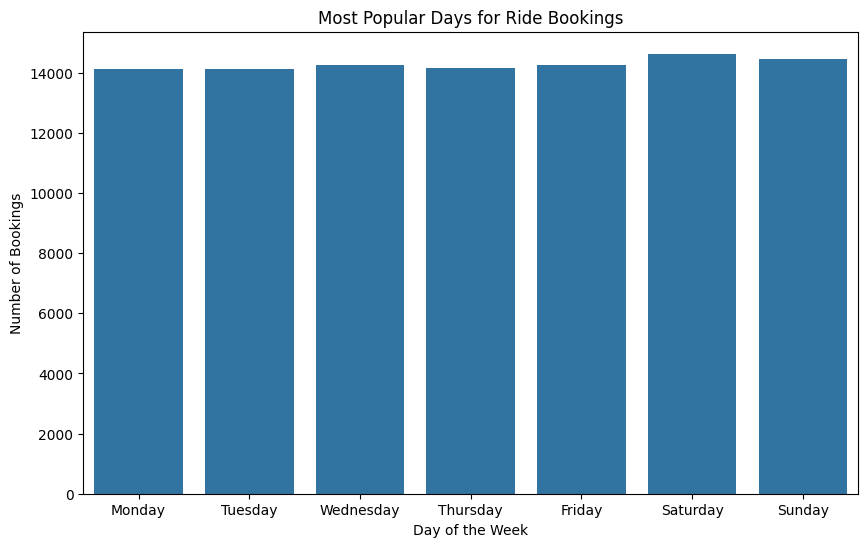

In [ ]:

# 2. Customer Engagement & Preferences
# Analysis of the most popular time slots and days for ride bookings
rapido_data['Booking_Hour'] = rapido_data['Booking_Date'].dt.hour
rapido_data['Booking_Day'] = rapido_data['Booking_Date'].dt.day_name()

# Popular time slots for bookings
plt.figure(figsize=(10, 6))
sns.countplot(x='Booking_Hour', data=rapido_data, palette='viridis')
plt.title('Most Popular Time Slots for Ride Bookings')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bookings')
plt.show()

# Popular days for bookings
plt.figure(figsize=(10, 6))
sns.countplot(x='Booking_Day', data=rapido_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Most Popular Days for Ride Bookings')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.show()

Average Travel Time: 31.97 minutes
Cancellation Rate: 50.18%


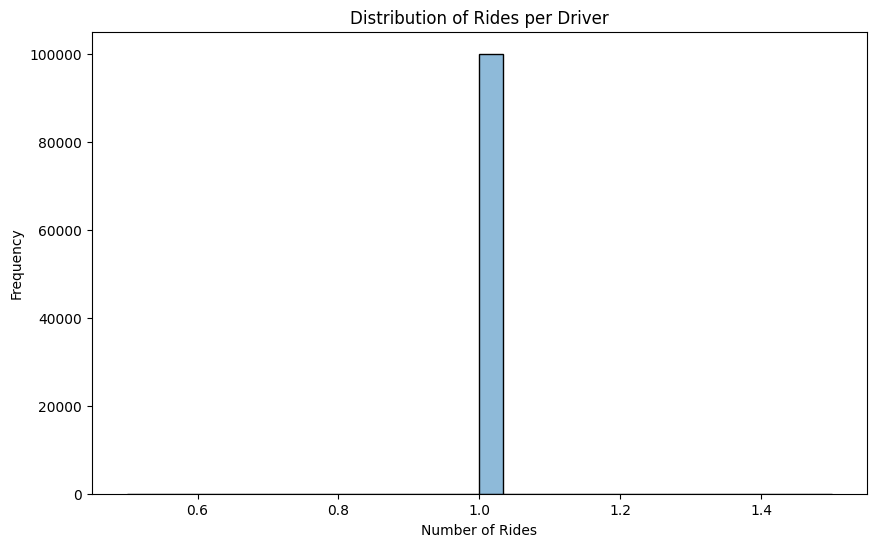

In [ ]:
# 3. Operational Efficiency & Driver Metrics
# Average ride completion time and cancellations
average_travel_time = rapido_data['Travel_Time'].mean()
cancellation_rate = rapido_data['Cancellation_Status'].mean()

print(f"Average Travel Time: {average_travel_time:.2f} minutes")
print(f"Cancellation Rate: {cancellation_rate * 100:.2f}%")

# Distribution of rides per driver
rides_per_driver = rapido_data['Driver_ID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(rides_per_driver, bins=30, kde=True)
plt.title('Distribution of Rides per Driver')
plt.xlabel('Number of Rides')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-0eb01d11e997>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment_Method', data=rapido_data, palette='Set2')


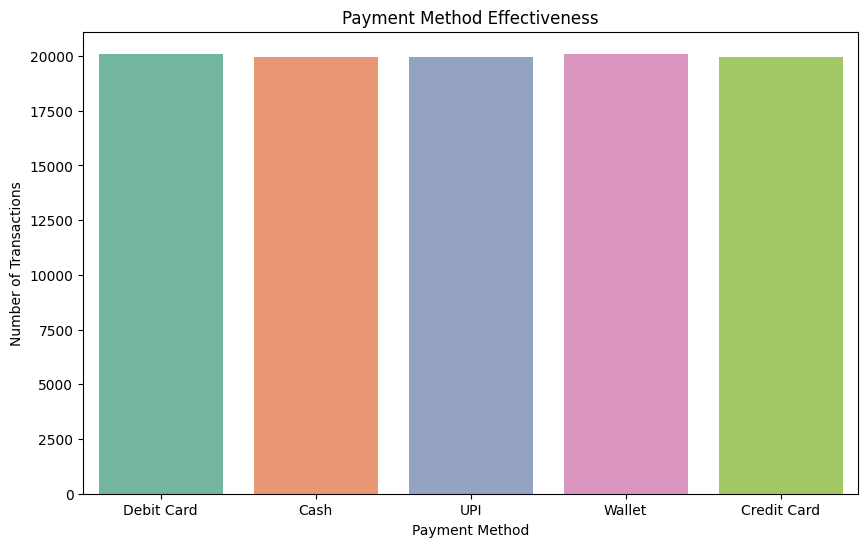

In [ ]:
# 4. Payment Gateway Effectiveness
# Effectiveness of different payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', data=rapido_data, palette='Set2')
plt.title('Payment Method Effectiveness')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

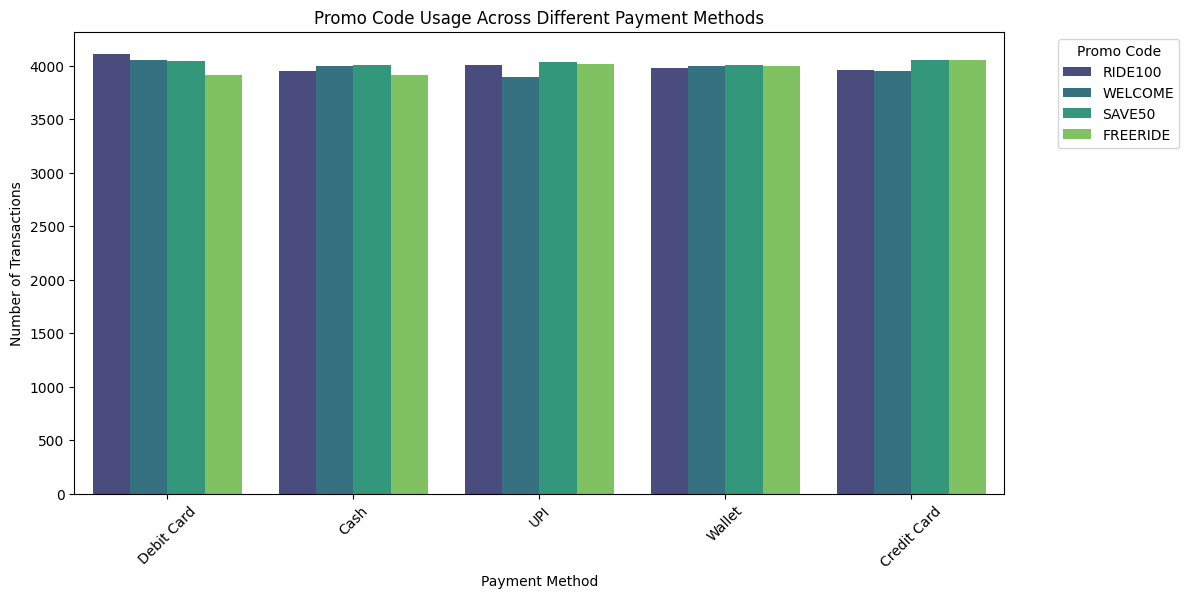

In [ ]:
# Analyzing promo code usage across different payment methods
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Method', hue='Promo_Code', data=rapido_data, palette='viridis')
plt.title('Promo Code Usage Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.legend(title='Promo Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-5bac2c476a92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo_Code', data=rapido_data, palette='coolwarm')


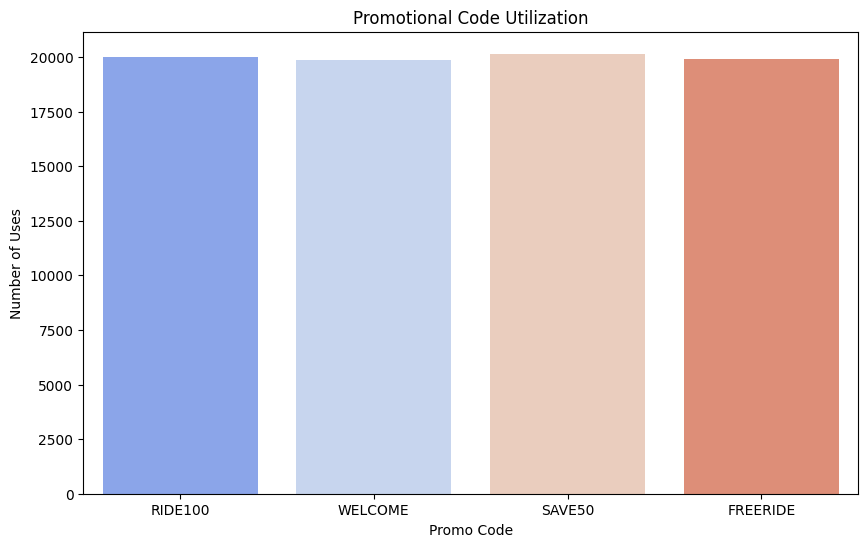

In [ ]:
# 5. Promo Code Utilization & Impact
# Promotional code usage analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo_Code', data=rapido_data, palette='coolwarm')
plt.title('Promotional Code Utilization')
plt.xlabel('Promo Code')
plt.ylabel('Number of Uses')
plt.show()

Correlation Matrix:
               Ride_Distance  Ride_Fare  Travel_Time
Ride_Distance       1.000000  -0.005054    -0.000354
Ride_Fare          -0.005054   1.000000     0.002412
Travel_Time        -0.000354   0.002412     1.000000


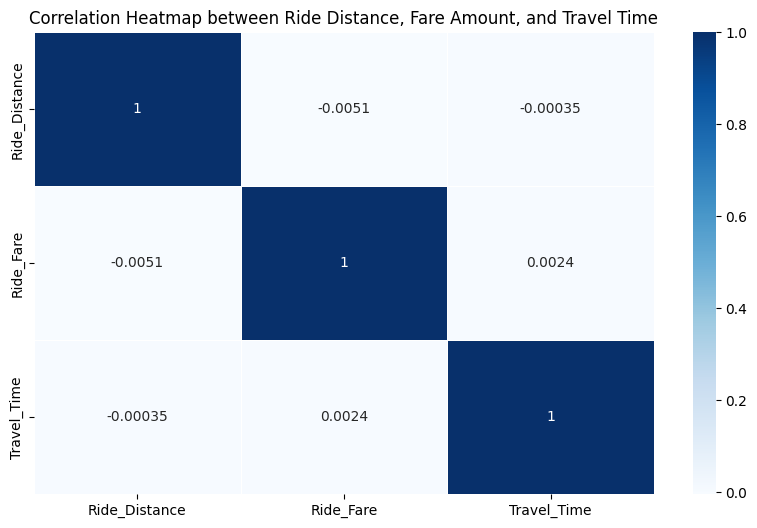

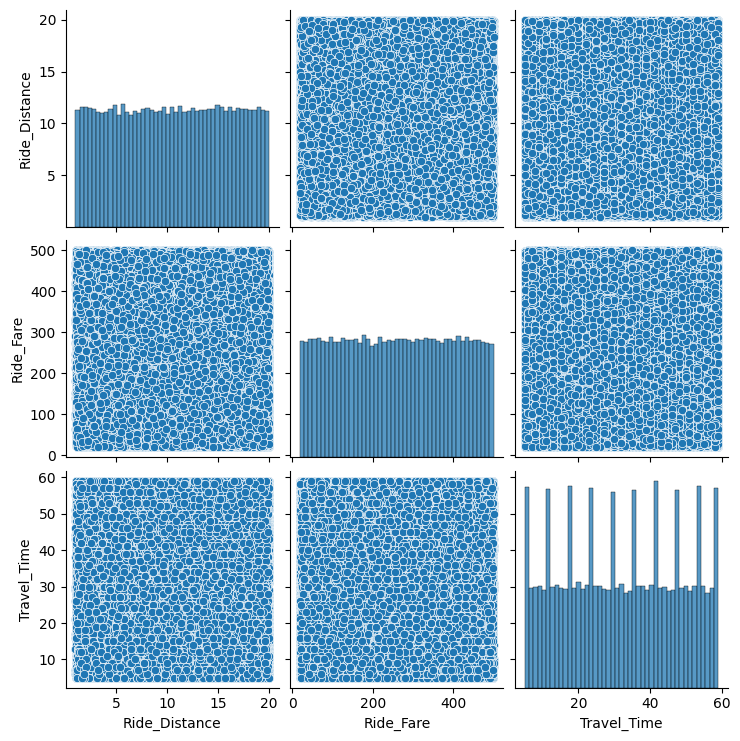

In [ ]:

# Calculate the correlation between Ride Distance, Ride Fare, and Travel Time
correlation_matrix = rapido_data[['Ride_Distance', 'Ride_Fare', 'Travel_Time']].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap between Ride Distance, Fare Amount, and Travel Time')
plt.show()

# Visualizing pairwise relationships between these variables
sns.pairplot(rapido_data[['Ride_Distance', 'Ride_Fare', 'Travel_Time']])
plt.show()

<ipython-input-17-10a3e4b39a09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Ride_Fare', data=rapido_data, palette='Set3')


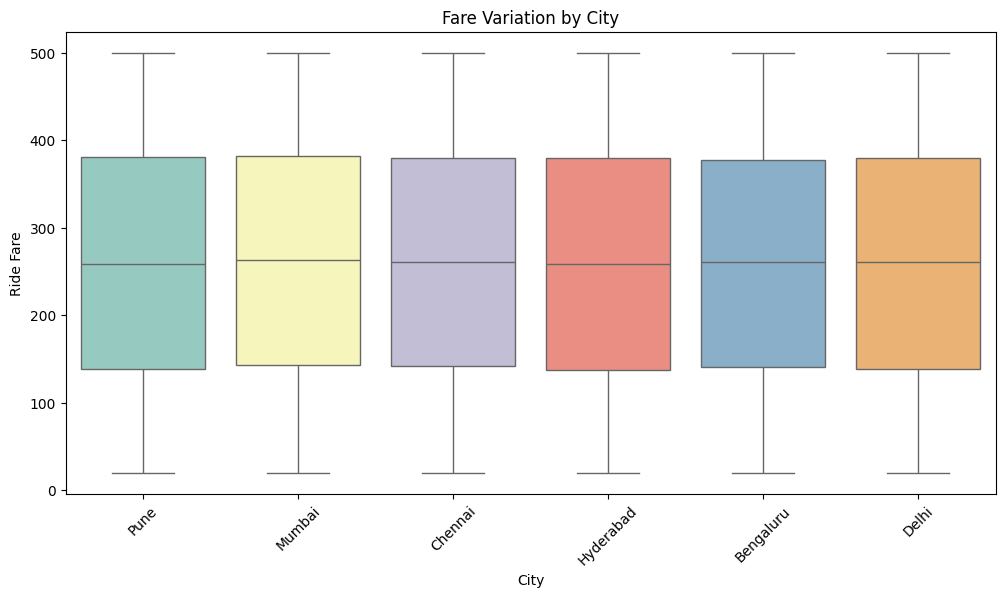

In [ ]:
# Analyzing fare variation by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Ride_Fare', data=rapido_data, palette='Set3')
plt.title('Fare Variation by City')
plt.xlabel('City')
plt.ylabel('Ride Fare')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-0107c23b3680>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate_city.index, y=cancellation_rate_city.values, palette='magma')


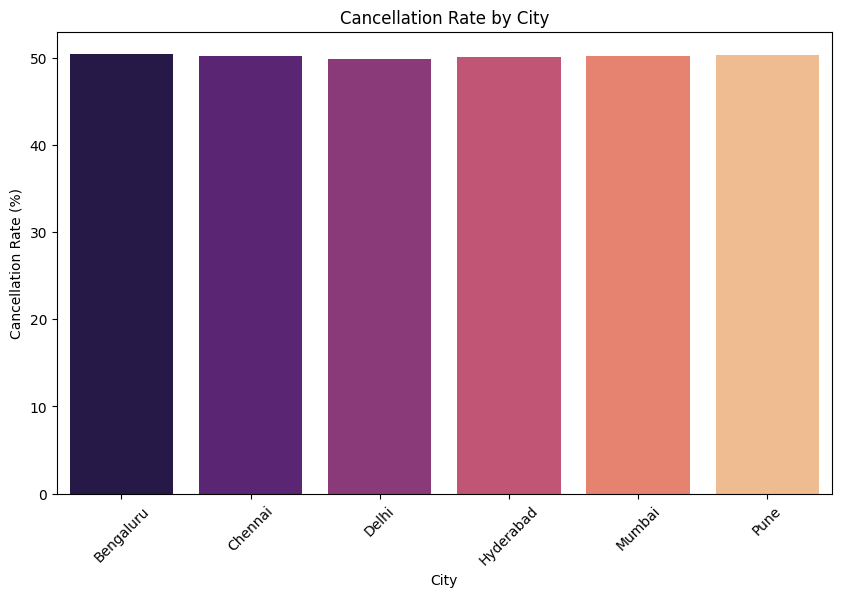

In [ ]:
# Analyzing cancellation rate by city
cancellation_rate_city = rapido_data.groupby('City')['Cancellation_Status'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate_city.index, y=cancellation_rate_city.values, palette='magma')
plt.title('Cancellation Rate by City')
plt.xlabel('City')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()


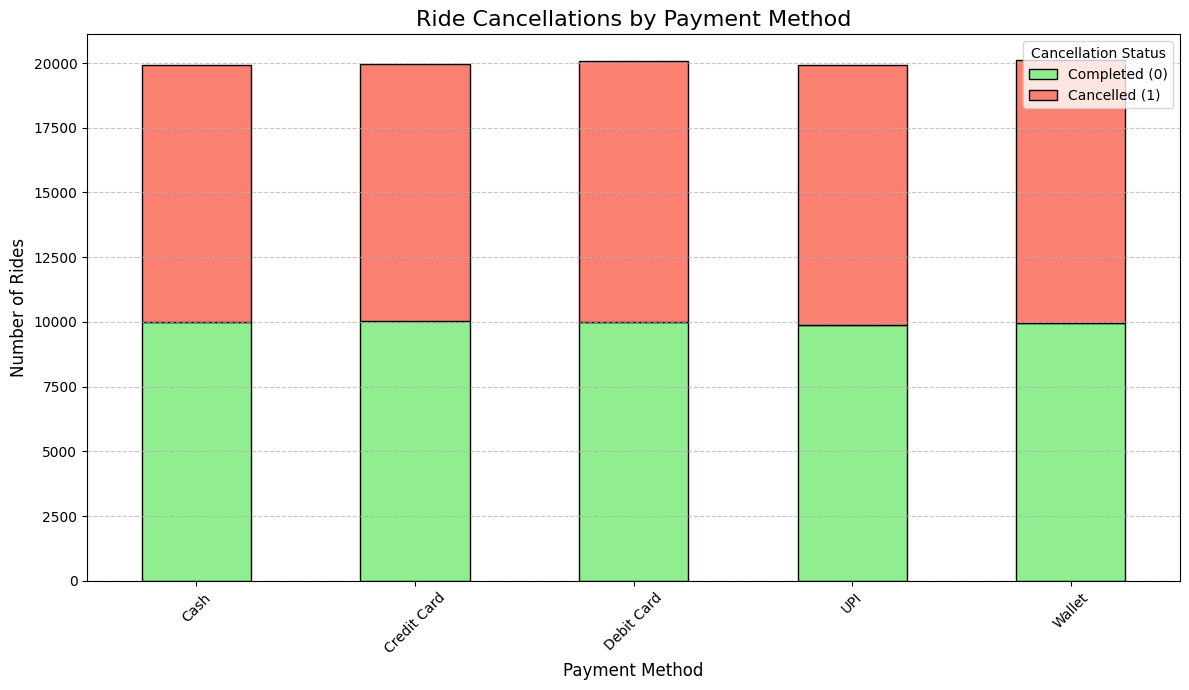

In [ ]:
# Group the data by Payment_Method and Cancellation_Status to analyze cancellations
cancellation_analysis = rapido_data.groupby(['Payment_Method', 'Cancellation_Status']).size().unstack()

# Plot the cancellations by payment method
cancellation_analysis.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Ride Cancellations by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.legend(['Completed (0)', 'Cancelled (1)'], title='Cancellation Status', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

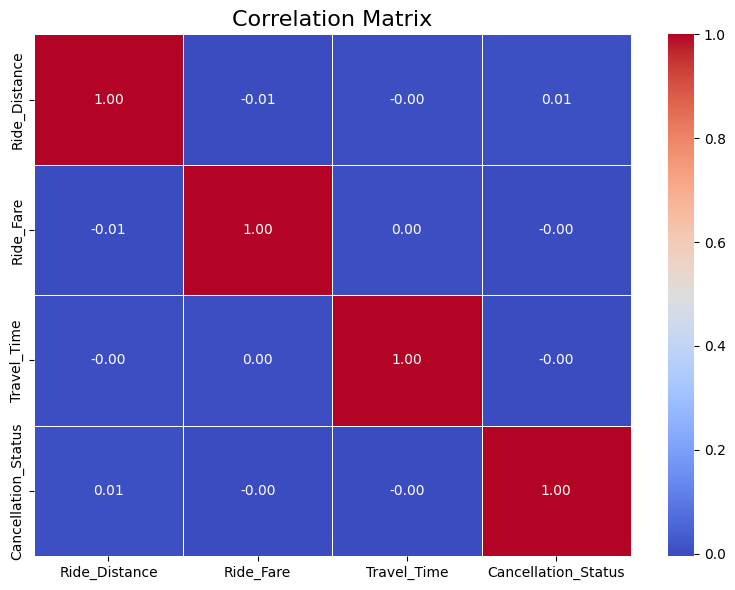

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = rapido_data[['Ride_Distance', 'Ride_Fare', 'Travel_Time', 'Cancellation_Status']].corr()

# Display the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

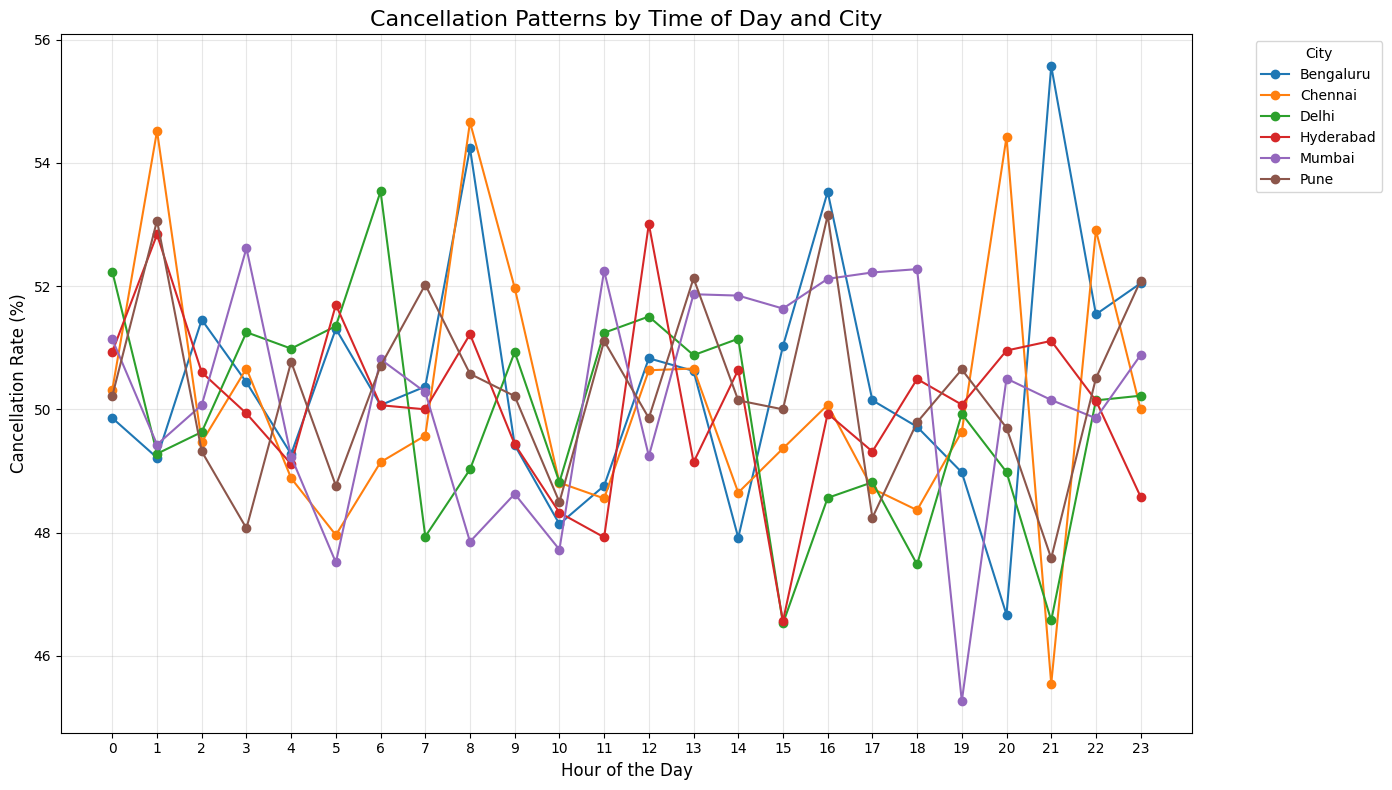

In [ ]:
# Extract hour from the booking date
rapido_data['Booking_Hour'] = pd.to_datetime(rapido_data['Booking_Date']).dt.hour

# Calculate cancellation rates by hour
hourly_cancellations = rapido_data.groupby('Booking_Hour')['Cancellation_Status'].mean() * 100

# Calculate cancellation rates by hour and city
hourly_city_cancellations = rapido_data.groupby(['Booking_Hour', 'City'])['Cancellation_Status'].mean().unstack() * 100

# Plot cancellation patterns by time of day for top cities
plt.figure(figsize=(14, 8))
hourly_city_cancellations.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Cancellation Patterns by Time of Day and City', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24), fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-18-2de89281cc5a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ride_count_by_city.index, y=ride_count_by_city.values, palette='viridis')


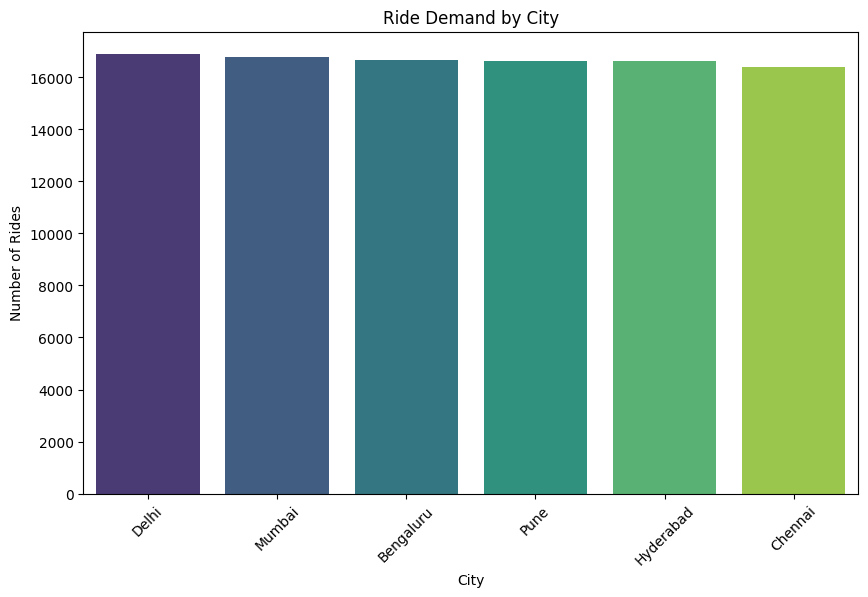

In [ ]:
# Identifying peak demand cities for rides
ride_count_by_city = rapido_data['City'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ride_count_by_city.index, y=ride_count_by_city.values, palette='viridis')
plt.title('Ride Demand by City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-f45a0953e386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Travel_Time', data=rapido_data, palette='Set2')


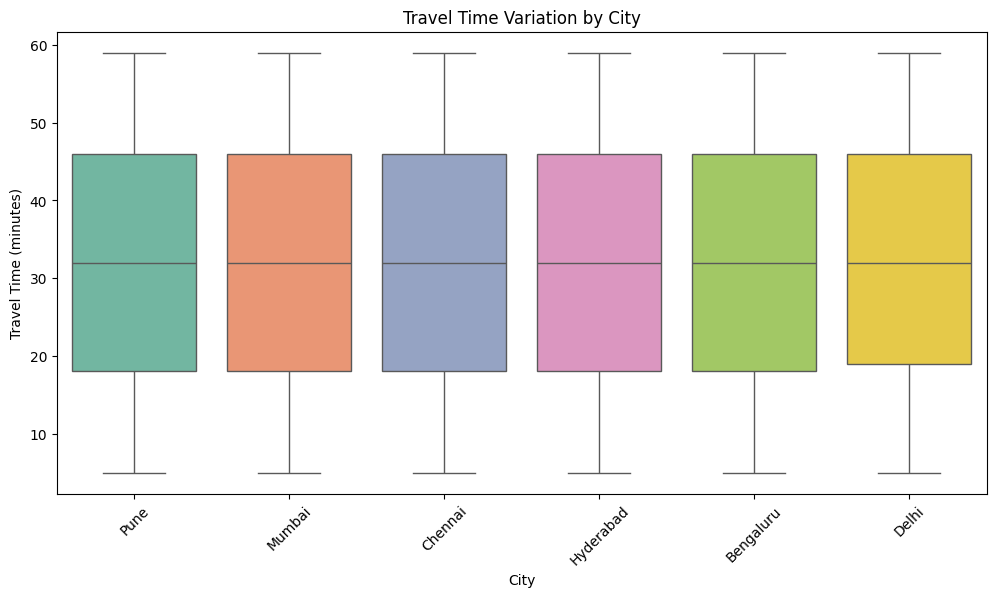

In [ ]:
# Analyzing travel time variation by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Travel_Time', data=rapido_data, palette='Set2')
plt.title('Travel Time Variation by City')
plt.xlabel('City')
plt.ylabel('Travel Time (minutes)')
plt.xticks(rotation=45)
plt.show()

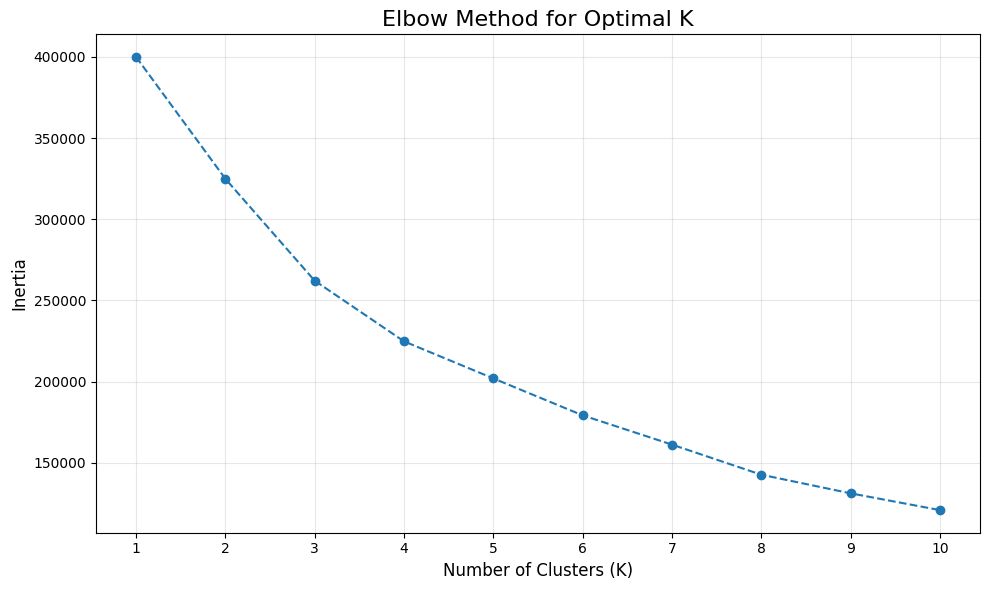

In [14]:
#Customer Segmentation using K-Mean clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_values)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

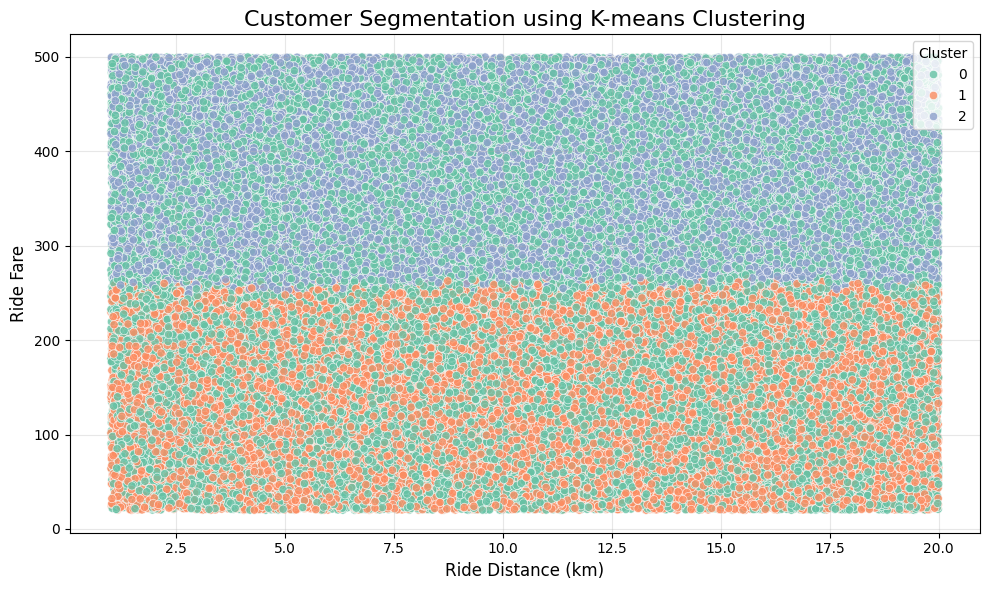

In [13]:

# Select features for clustering
features = rapido_data[['Ride_Fare', 'Ride_Distance', 'Travel_Time', 'Cancellation_Status']]

# Handle missing values if any (fill with mean)
features = features.fillna(features.mean())

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Apply K-means with the optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rapido_data['Cluster'] = kmeans.fit_predict(normalized_features)

# Analyze and visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rapido_data,
    x='Ride_Distance',
    y='Ride_Fare',
    hue='Cluster',
    palette='Set2',
    alpha=0.8
)
plt.title('Customer Segmentation using K-means Clustering', fontsize=16)
plt.xlabel('Ride Distance (km)', fontsize=12)
plt.ylabel('Ride Fare', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
